<a href="https://colab.research.google.com/github/pravin2072/Play_store_app/blob/main/13_4_23_Play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
%matplotlib inline
import warnings

Importing Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
working_path = '/content/drive/MyDrive/Play Store Data (1).csv'
data_df = pd.read_csv(working_path)

In [5]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
# Categories present in data
data_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
# Checking all the column names
data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
# Checking NO. of rows and columns
shape = data_df.shape

In [10]:
print("Number of rows: ", shape[0])
print("Number of columns: ", shape[1])

Number of rows:  10841
Number of columns:  13


In [11]:
data_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Cleaning Data

In [12]:
data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [13]:
data_df['Reviews'] = pd.to_numeric(data_df['Reviews'],errors = 'coerce')
data_df['Reviews'].isnull().sum()

1

In [14]:
# Null Count in Each Column
for i in data_df.columns:
    print(i,"=",data_df[i].isna().sum(),'\n')

App = 0 

Category = 0 

Rating = 1474 

Reviews = 1 

Size = 0 

Installs = 0 

Type = 1 

Price = 0 

Content Rating = 1 

Genres = 0 

Last Updated = 0 

Current Ver = 8 

Android Ver = 3 



Duplicate Values 


In [15]:
# Checking Duplicate Rows
data_df.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [16]:
# Duplicate Apps
data_df.duplicated(['App']).value_counts()

False    9660
True     1181
dtype: int64

In [17]:
# Dropping duplicate Apps
data_df.drop_duplicates(['App'],inplace=True)

In [18]:
data_df.shape
shape = data_df.shape
print("Change in Number of rows: ", shape[0])
print("Change in Number of columns: ", shape[1])

Change in Number of rows:  9660
Change in Number of columns:  13


In [19]:
# Dropping duplicate category, reviews, size & installs
data_df.drop_duplicates(['Category', 'Reviews', 'Size', 'Installs'], inplace = True)

In [20]:
# Check For The Outliers
# Importing plotly.express library as px 
import plotly.express as px
# Using scatter plot
px.scatter(data_df, x = data_df.Rating)

In [21]:
# Convert Reviews To int 
data_df['Reviews']=pd.to_numeric(data_df['Reviews'])

In [22]:
# Dropping Current version, last updated & android version 
try: 
    data_df = data_df.drop(['Last Updated','Current Ver'],axis=1)
except:
      data_df

In [23]:
NAN_value=data_df.dropna(subset=['Rating','Type','Content Rating', 'Category'])
NAN_value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,"1,000+",Free,0,Everyone,Books & Reference,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,Varies with device


Price information 


In [24]:
for a in data_df['Price'].unique() :
    print(a)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [25]:
def fix_price(a) :
    try :
        if a.startswith('$') :
            return float(a[1:])
        elif a.startswith('Everyone') :
            return float(0)
        else :
            return float(a)
    except :
        return float(0)

In [26]:
data_df['Price'] = data_df['Price'].apply(fix_price)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9569 non-null   object 
 1   Category        9569 non-null   object 
 2   Rating          8180 non-null   float64
 3   Reviews         9568 non-null   float64
 4   Size            9569 non-null   object 
 5   Installs        9569 non-null   object 
 6   Type            9568 non-null   object 
 7   Price           9569 non-null   float64
 8   Content Rating  9568 non-null   object 
 9   Genres          9569 non-null   object 
 10  Android Ver     9566 non-null   object 
dtypes: float64(3), object(8)
memory usage: 897.1+ KB


FIXING SIZE

In [27]:
# Clean the 'Size' convert 'Size' object into Float
# While analyzing the data in pivot table found a value with 1000+

index = data_df[data_df['Size']== '1,000+'].index
data_df.drop(axis=0,inplace=True, index=index)

S = [i for i in data_df['Size']]

def clean_sizes (sizes):

  Cleaned_data=[]

  for s in sizes:
    s = str(s)
    if 'M' in s:
      s = s.replace('M' , '')
      s=float(s)
      
      


    elif 'k' in s:
      s= s.replace('k', '')
      s=float(s)
      s= s/1024                   

    elif 'Varies with device' in s:
      s=float(0)
      

    Cleaned_data.append(s)

  return Cleaned_data
data_df['Size'] = clean_sizes(S)
data_df['Size']= data_df['Size'].astype(float)


In [28]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


In [29]:
data_df.describe()

,Rating,Reviews,Size,Price
count,8179.000000,9.568000e+03,9568.000000,9568.000000
mean,4.173346,2.186487e+05,17.812988,1.106414
std,0.535818,1.839887e+06,21.570160,16.929383
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.800000e+01,2.900000,0.000000
50%,4.300000,1.028500e+03,9.100000,0.000000
75%,4.500000,2.985725e+04,25.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


Diffrent columns distrubution graphs (Histograph and bar graph)

In [30]:
import matplotlib.pyplot as plt

In [31]:
def column_distribution(data_df, nGraphShown, nGraphPerRow):
    HC = data_df.nunique()
    data_df = data_df[[col for col in data_df if HC[col] > 1 and HC[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data_df.shape
    columnNames = list(data_df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data_df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

            plt.style.use('classic')
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [32]:
nRowsRead = 1000 
# googleplaystore.csv has 10841 rows in reality, but we are only loading/previewing the first 1000 rows
df_1 = pd.read_csv('/content/drive/MyDrive/Play Store Data (1).csv', delimiter=',', nrows = nRowsRead)
df_1.dataframeName = 'googleplaystore.csv'
nRow, nCol = df_1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 13 columns


In [33]:
df_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
data_df.describe()

,Rating,Reviews,Size,Price
count,8179.000000,9.568000e+03,9568.000000,9568.000000
mean,4.173346,2.186487e+05,17.812988,1.106414
std,0.535818,1.839887e+06,21.570160,16.929383
min,1.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.800000e+01,2.900000,0.000000
50%,4.300000,1.028500e+03,9.100000,0.000000
75%,4.500000,2.985725e+04,25.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9568 non-null   object 
 1   Category        9568 non-null   object 
 2   Rating          8179 non-null   float64
 3   Reviews         9568 non-null   float64
 4   Size            9568 non-null   float64
 5   Installs        9568 non-null   object 
 6   Type            9567 non-null   object 
 7   Price           9568 non-null   float64
 8   Content Rating  9568 non-null   object 
 9   Genres          9568 non-null   object 
 10  Android Ver     9566 non-null   object 
dtypes: float64(4), object(7)
memory usage: 897.0+ KB


In [36]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
7962,"Super Resume Builder Pro, CV",BUSINESS,4.4,244.0,6.9,"1,000+",Paid,4.99,Everyone,Business,2.3 and up
1620,Homestyler Interior Design & Decorating Ideas,LIFESTYLE,4.1,78298.0,29.0,"5,000,000+",Free,0.00,Everyone,Lifestyle,4.1 and up
4862,Abs Workout - Burn Belly Fat with No Equipment,HEALTH_AND_FITNESS,4.8,69279.0,10.0,"10,000,000+",Free,0.00,Everyone,Health & Fitness,4.2 and up
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,0.0,"1,000,000,000+",Free,0.00,Everyone,Photography,Varies with device
5990,British Columbia License,FAMILY,3.3,14.0,11.0,"1,000+",Free,0.00,Everyone,Education,4.0 and up


<Axes: xlabel='Rating'>

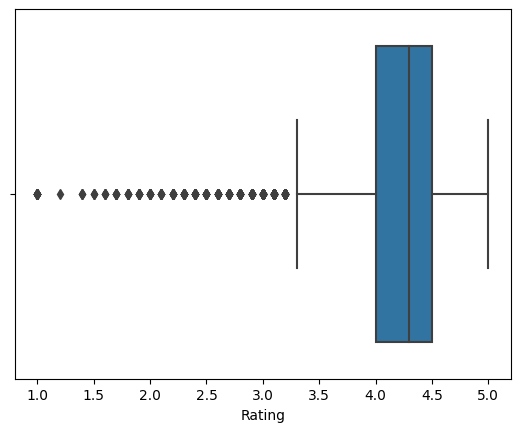

In [37]:
sns.boxplot(x='Rating',data = data_df)

EDA { DATA EXPLORATION }

Ques. 1 - What is the Percentage of each application type in google play store ?

In [38]:
x = data_df.groupby(['Category'],as_index=False)['App'].count()
px.pie(x,values='App',names='Category',title='Percentage Of Each Apps Type').show()

print('Top 10 Comman Apps Category in Google Play Store','\n'
      ,x.sort_values(by ='App',ascending =False))
x.head()

Top 10 Comman Apps Category in Google Play Store 
                Category   App
11               FAMILY  1811
14                 GAME   958
29                TOOLS   823
4              BUSINESS   413
20              MEDICAL   374
25         PRODUCTIVITY   372
23      PERSONALIZATION   371
18            LIFESTYLE   367
12              FINANCE   343
6         COMMUNICATION   309
28               SPORTS   309
15   HEALTH_AND_FITNESS   286
24          PHOTOGRAPHY   281
21   NEWS_AND_MAGAZINES   254
27               SOCIAL   239
3   BOOKS_AND_REFERENCE   222
30     TRAVEL_AND_LOCAL   219
26             SHOPPING   202
7                DATING   171
31        VIDEO_PLAYERS   163
19  MAPS_AND_NAVIGATION   131
8             EDUCATION   119
13       FOOD_AND_DRINK   111
9         ENTERTAINMENT   102
1     AUTO_AND_VEHICLES    85
17   LIBRARIES_AND_DEMO    84
32              WEATHER    78
16       HOUSE_AND_HOME    74
10               EVENTS    64
0        ART_AND_DESIGN    64
22            PAREN

,Category,App
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,413


Ques. 2 - Which Genre / Category has the highest & which has the lowest number of apps ?


In [39]:
data_df['Category'].value_counts()

FAMILY                 1811
GAME                    958
TOOLS                   823
BUSINESS                413
MEDICAL                 374
PRODUCTIVITY            372
PERSONALIZATION         371
LIFESTYLE               367
FINANCE                 343
COMMUNICATION           309
SPORTS                  309
HEALTH_AND_FITNESS      286
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          111
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  78
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [40]:
def column_distribution(data_df, nGraphShown, nGraphPerRow):
    nCol = data_df.shape[1]
    columnNames = list(data_df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        sns.catplot(x='Category', kind='count', data=data_df, palette='viridis')
        plt.xticks(rotation=75)
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

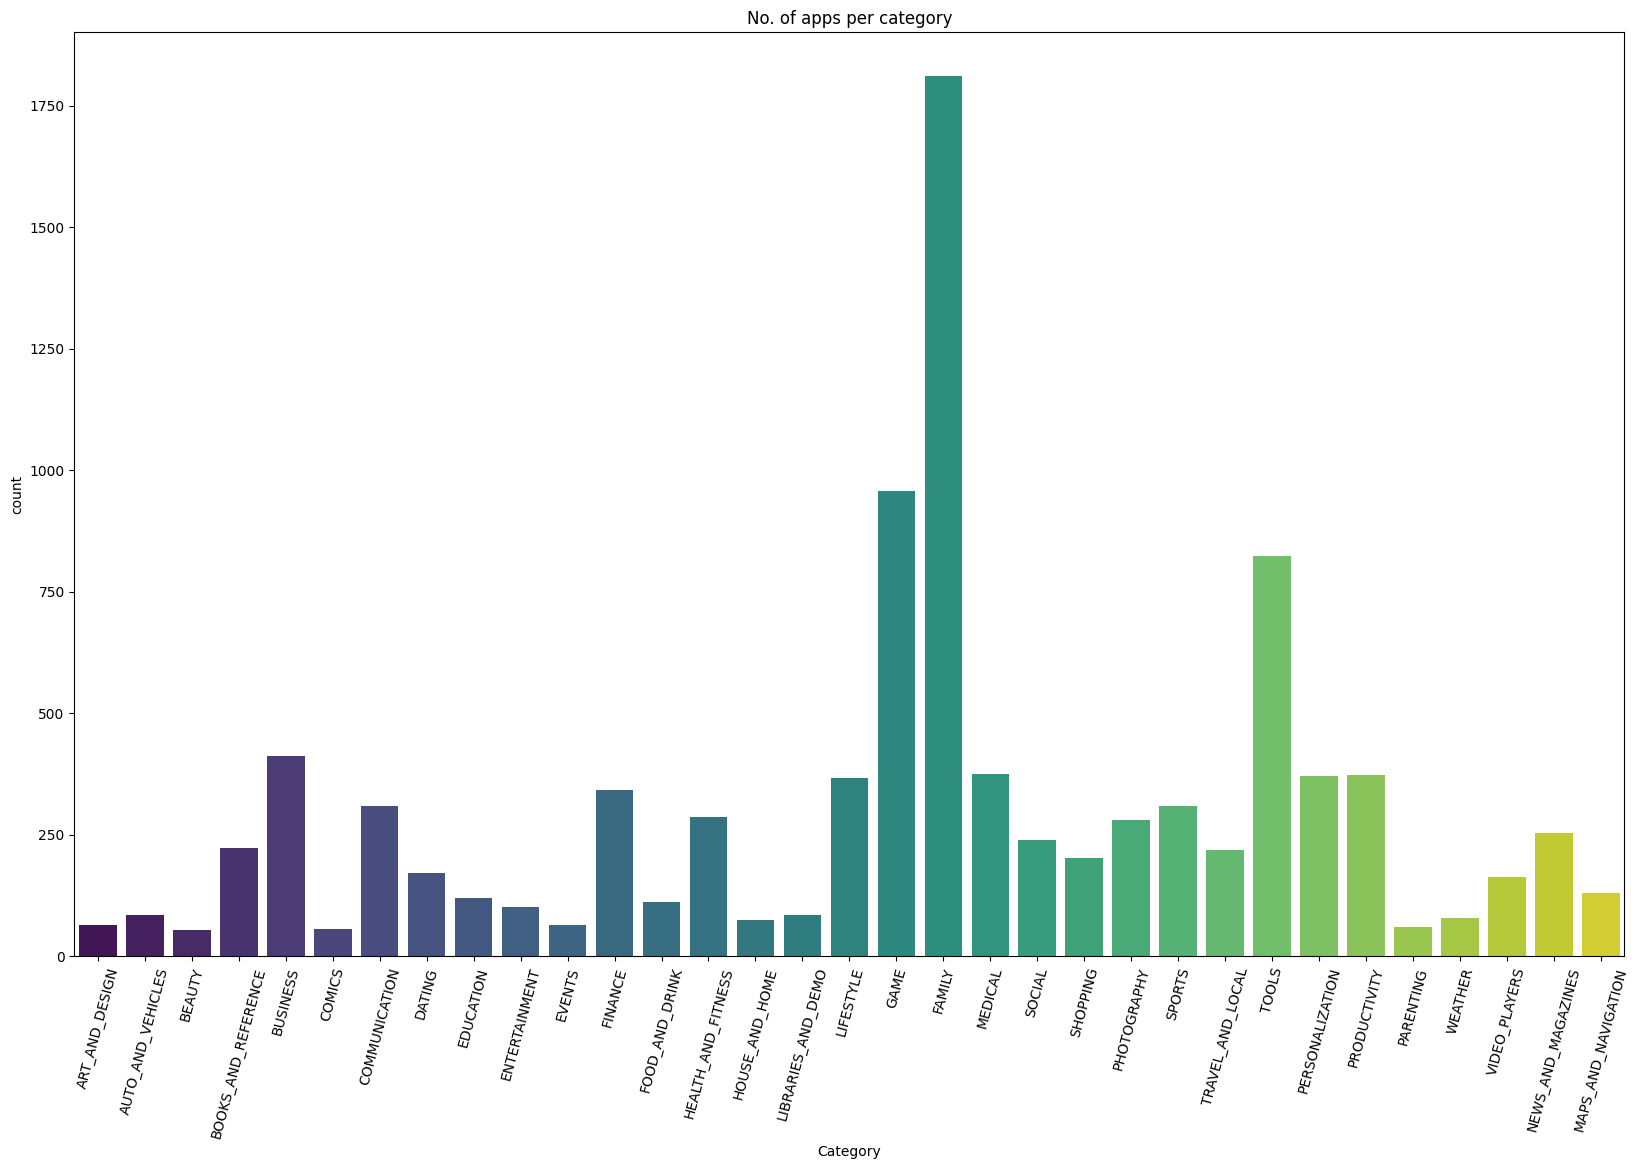

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
z = sns.countplot(x='Category', data=data_df, palette='viridis')
z.set_xticklabels(z.get_xticklabels(), rotation=75)
plt.title('No. of apps per category')
plt.show()


Reviewing top 5 categories

<Axes: title={'center': 'Top 5 Categories'}, ylabel='Category'>

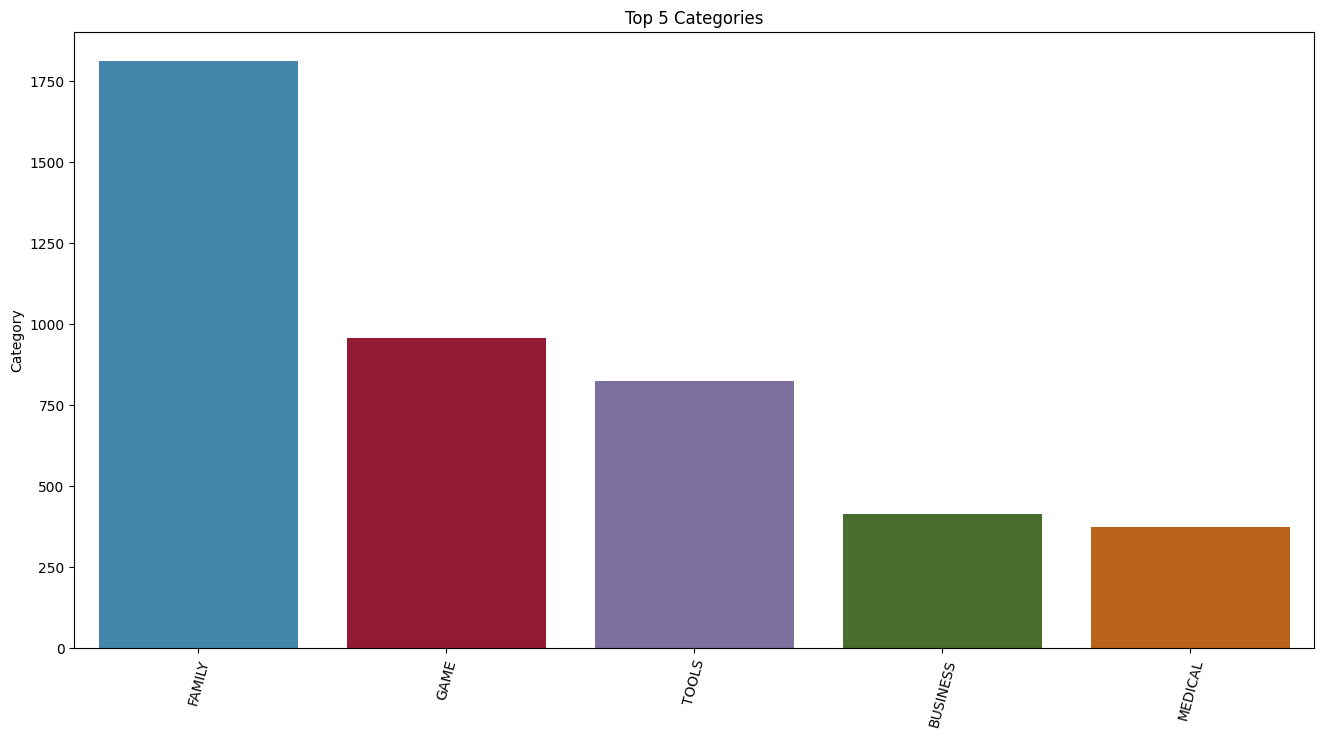

In [42]:
top = data_df.Category.value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(16,8))
plt.xticks(rotation=75)
plt.title('Top 5 Categories')
ylable = ('Number of Apps')
plt.style.use('bmh')
sns.barplot(x= top.index, y=top)

Ques. 3 - What percentage of apps are paid & free in google play store, also the amount of paid & free apps in diff. categories in play store ?

In [43]:
x = data_df.groupby('Type',as_index=False)['App'].count()
print('\n'*2+'Most Of Apps In Google Play are Free'+'\n'*2)
px.pie(x,values='App',names='Type',color='Type',
       color_discrete_map={'Free':'purple','Paid':'yellow'}).show()



Most Of Apps In Google Play are Free





Amount of Apps in paid & free apps in diff. categories in google play store.

In [44]:
amount = data_df.groupby(['Type','Category'],as_index=False)['App'].count()
px.sunburst(amount, values='App', path=['Type','Category'], title='Amount Of Apps in Paid and Free Category', color='Category')

# Here we have used plotly sunburst plots to visualize hierarchical data spanning outwards radically from the roots to leaves (just like a doughnut).
# Here the sectors are determined by the categories and the inner ring tells about the % of free & paid apps.

Ques. 4 - Finding the reviews on the basis of category wise dataset ?

In [45]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
1900,Jewels Star: OZ adventure,GAME,4.5,21892.0,14.0,"1,000,000+",Free,0.0,Everyone,Puzzle,4.0 and up
8430,DrivingTest,FAMILY,2.9,975.0,45.0,"100,000+",Free,0.0,Everyone,Simulation,4.1 and up
2986,ESPN Fantasy Sports,SPORTS,4.0,176448.0,10.0,"5,000,000+",Free,0.0,Everyone,Sports,4.4 and up
10367,FG SPINNER,GAME,NaN,2.0,36.0,10+,Free,0.0,Everyone,Board,4.0.3 and up
6001,bd's Mongolian Grill,LIFESTYLE,4.2,120.0,14.0,"10,000+",Free,0.0,Everyone,Lifestyle,4.1 and up


<ipython-input-46-c3f37bb54d36>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<BarContainer object of 9568 artists>

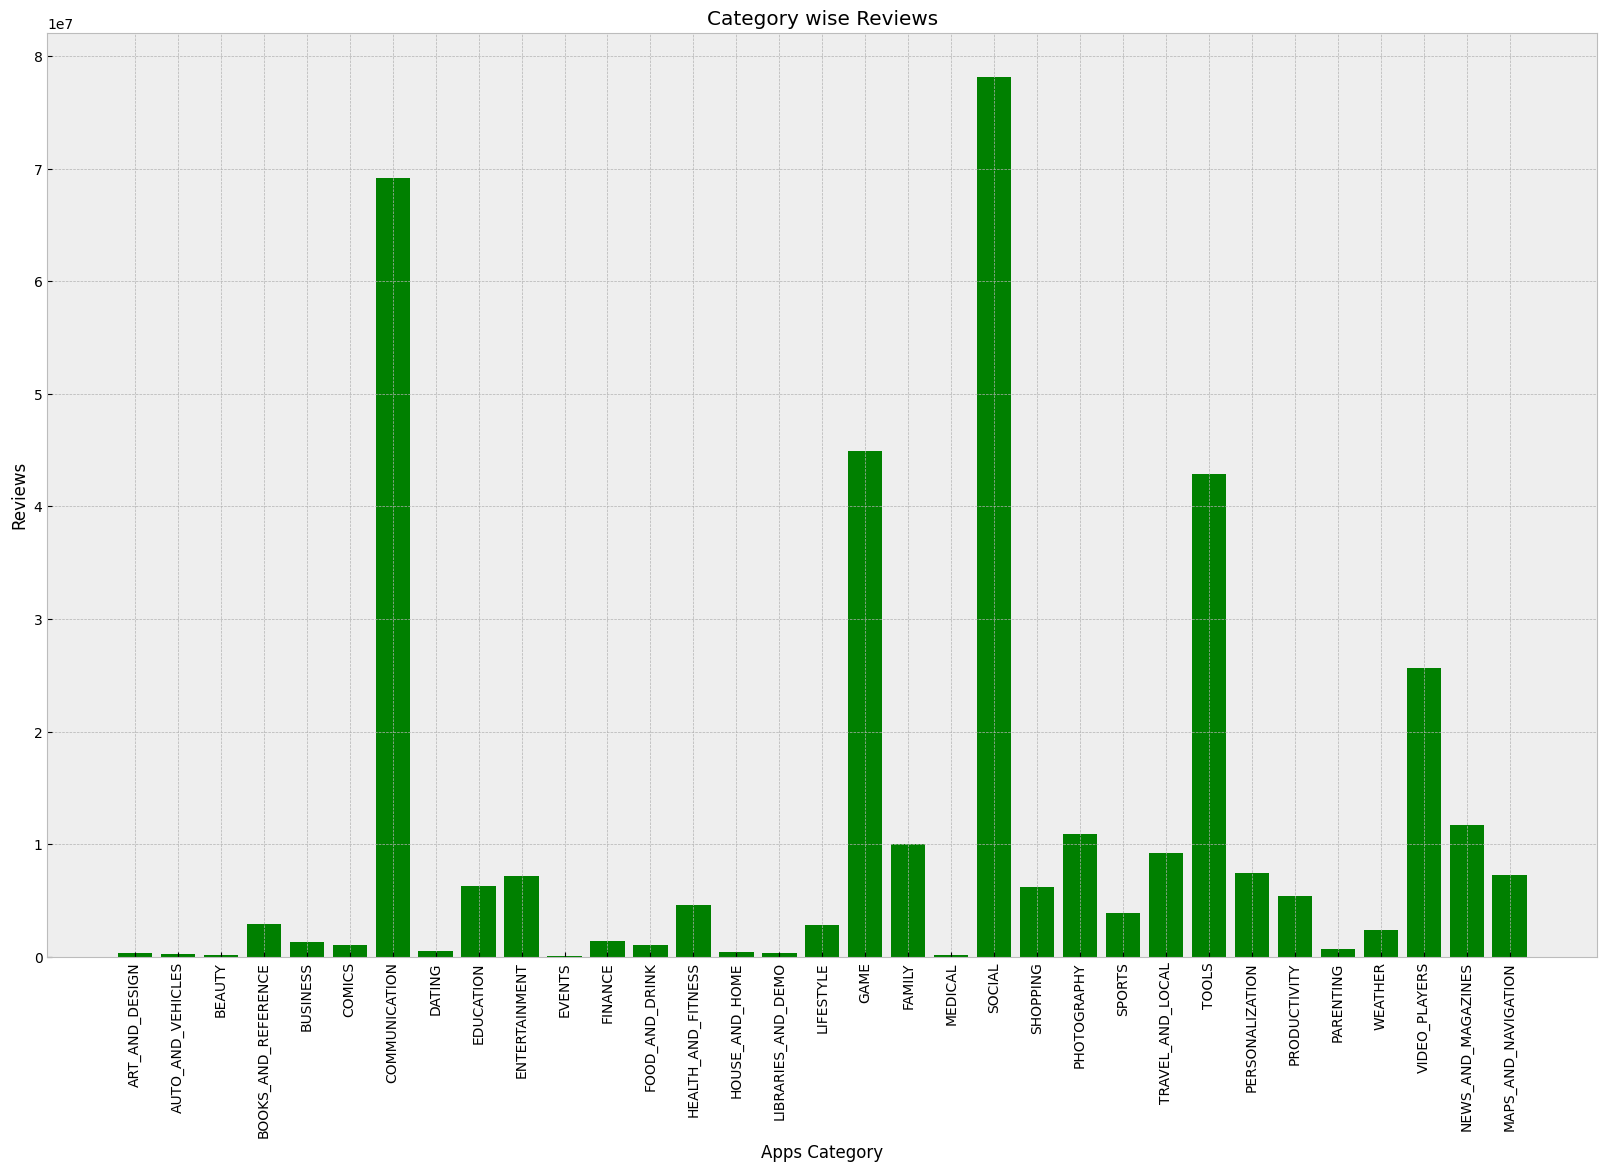

In [46]:
# FINDING REVIEWS CATEGORY WISE

# ploting bar graph
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)

plt.style.use('seaborn-deep')
plt.title('Category wise Reviews')
plt.xlabel('Apps Category')
plt.ylabel('Reviews')
plt.bar(data_df.Category,data_df.Reviews,color='g')


Here by looking at this bar graph we conclude that most of apps which are built as social media or communication apps have highest reviews follwed by 'game' & 'family'

Ques. 5 - which are the top 10 social media/communication apps and games ?

In [47]:
social_df = data_df[data_df.Category!='GAME']
social_df.sort_values(by = ['Installs','Reviews', 'Rating'], ascending = False)[['App','Installs','Reviews', 'Rating', 'Type']].head(10)

,App,Installs,Reviews,Rating,Type
4005,Clean Master- Space Cleaner & Antivirus,"500,000,000+",42916526.0,4.7,Free
7536,"Security Master - Antivirus, VPN, AppLock, Boo...","500,000,000+",24900999.0,4.7,Free
378,UC Browser - Fast Download Private & Secure,"500,000,000+",17712922.0,4.5,Free
2550,Snapchat,"500,000,000+",17014787.0,4.0,Free
3739,Twitter,"500,000,000+",11667403.0,4.3,Free
342,Viber Messenger,"500,000,000+",11334799.0,4.3,Free
403,LINE: Free Calls & Messages,"500,000,000+",10790289.0,4.2,Free
2546,Facebook Lite,"500,000,000+",8606259.0,4.3,Free
3255,SHAREit - Transfer & Share,"500,000,000+",7790693.0,4.6,Free
3703,MX Player,"500,000,000+",6474426.0,4.5,Free


Calculating the average rating of social apps

In [48]:
rating = social_df.Rating.mean()
print('The overall average rating of Apps is {:.2f} '.format(rating))

The overall average rating of Apps is 4.16 


Top 10 Games

In [49]:
game_df =data_df[data_df.Category=='GAME']
game_df.sort_values(by = ['Installs','Reviews', 'Rating'], ascending = False)[['App','Installs','Reviews', 'Rating', 'Type']].head(10)

,App,Installs,Reviews,Rating,Type
1655,Candy Crush Saga,"500,000,000+",22426677.0,4.4,Free
1722,My Talking Tom,"500,000,000+",14891223.0,4.5,Free
1662,Pou,"500,000,000+",10485308.0,4.3,Free
1661,Temple Run 2,"500,000,000+",8118609.0,4.3,Free
4999,AE Bingo: Offline Bingo Games,"500,000+",61746.0,4.4,Free
7152,ARK: Survival Evolved,"500,000+",51523.0,3.8,Free
4901,Assassin's Creed Identity,"500,000+",42529.0,3.7,Paid
4975,Solitaire: Decked Out Ad Free,"500,000+",37302.0,4.9,Free
9595,Fun Texas Hold'em Poker,"500,000+",32831.0,4.5,Free
1858,Might & Magic: Elemental Guardians,"500,000+",32551.0,4.3,Free


Calculating the average rating of Games

In [50]:
rating_2 = game_df.Rating.mean()
print('The overall average rating of Game is {:.2f} '.format(rating_2))

The overall average rating of Game is 4.25 


## **Now detecting the average rating in the play store app & plotting a graph on it.**


In [51]:
overall_rating = data_df.Rating.mean()
print('The average rating in playstore is {:.2f} '.format(rating_2))

The average rating in playstore is 4.25 


<ipython-input-52-e04c0c98e5e2>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




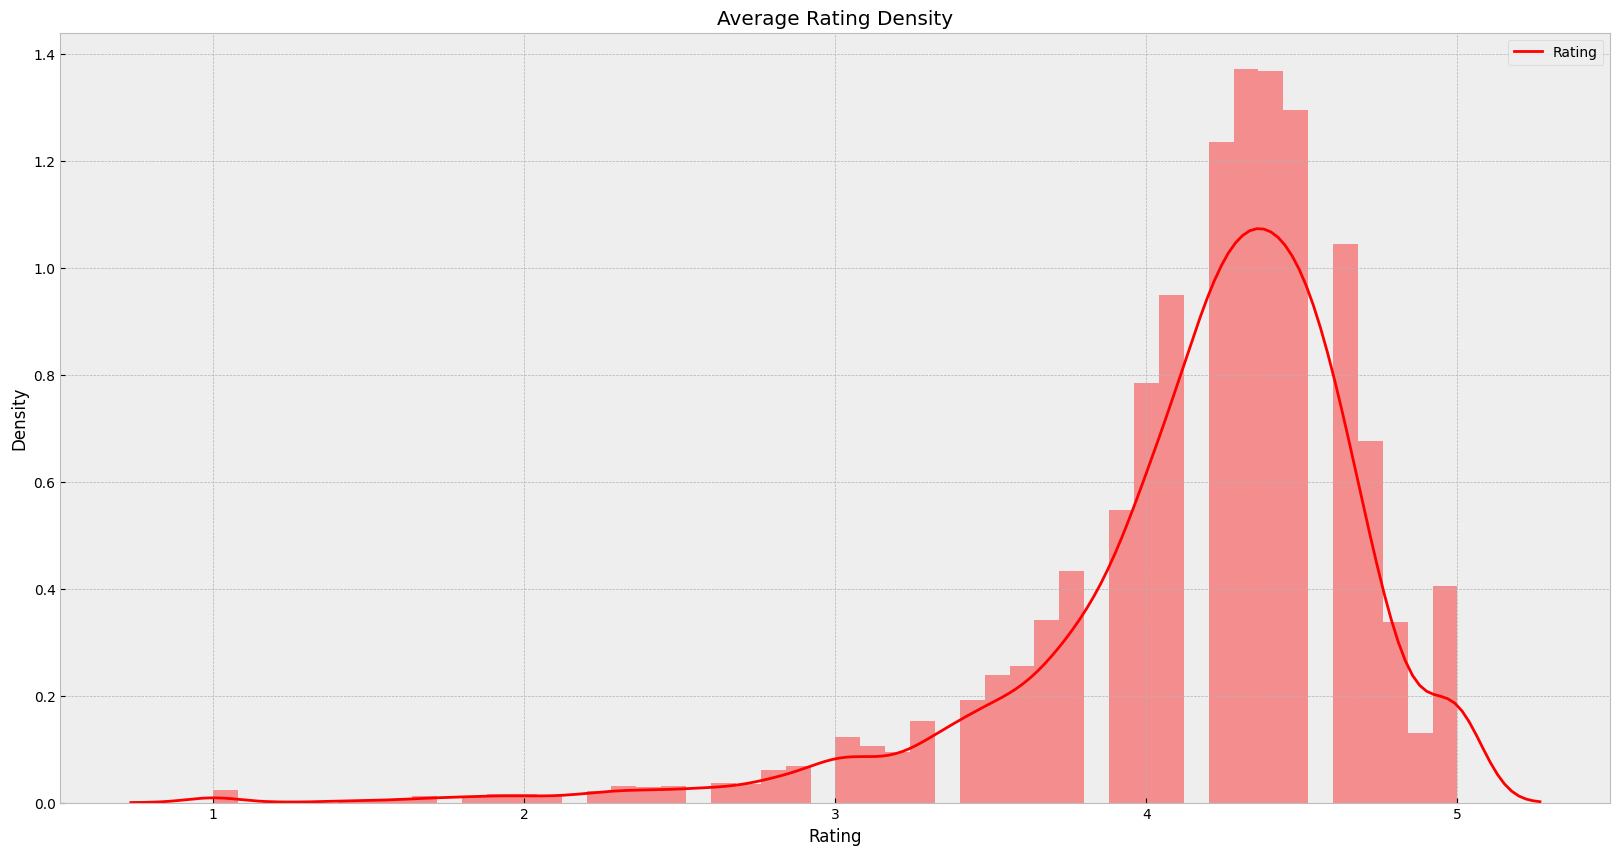

In [52]:
plt.figure(figsize=(20,10))
sns.distplot(data_df['Rating'],color = 'red')

plt.style.use('tableau-colorblind10')
plt.legend(['Rating'])
plt.title('Average Rating Density')
plt.show()

Ques. 6 - What are the sizes of the applications present in different categories ?

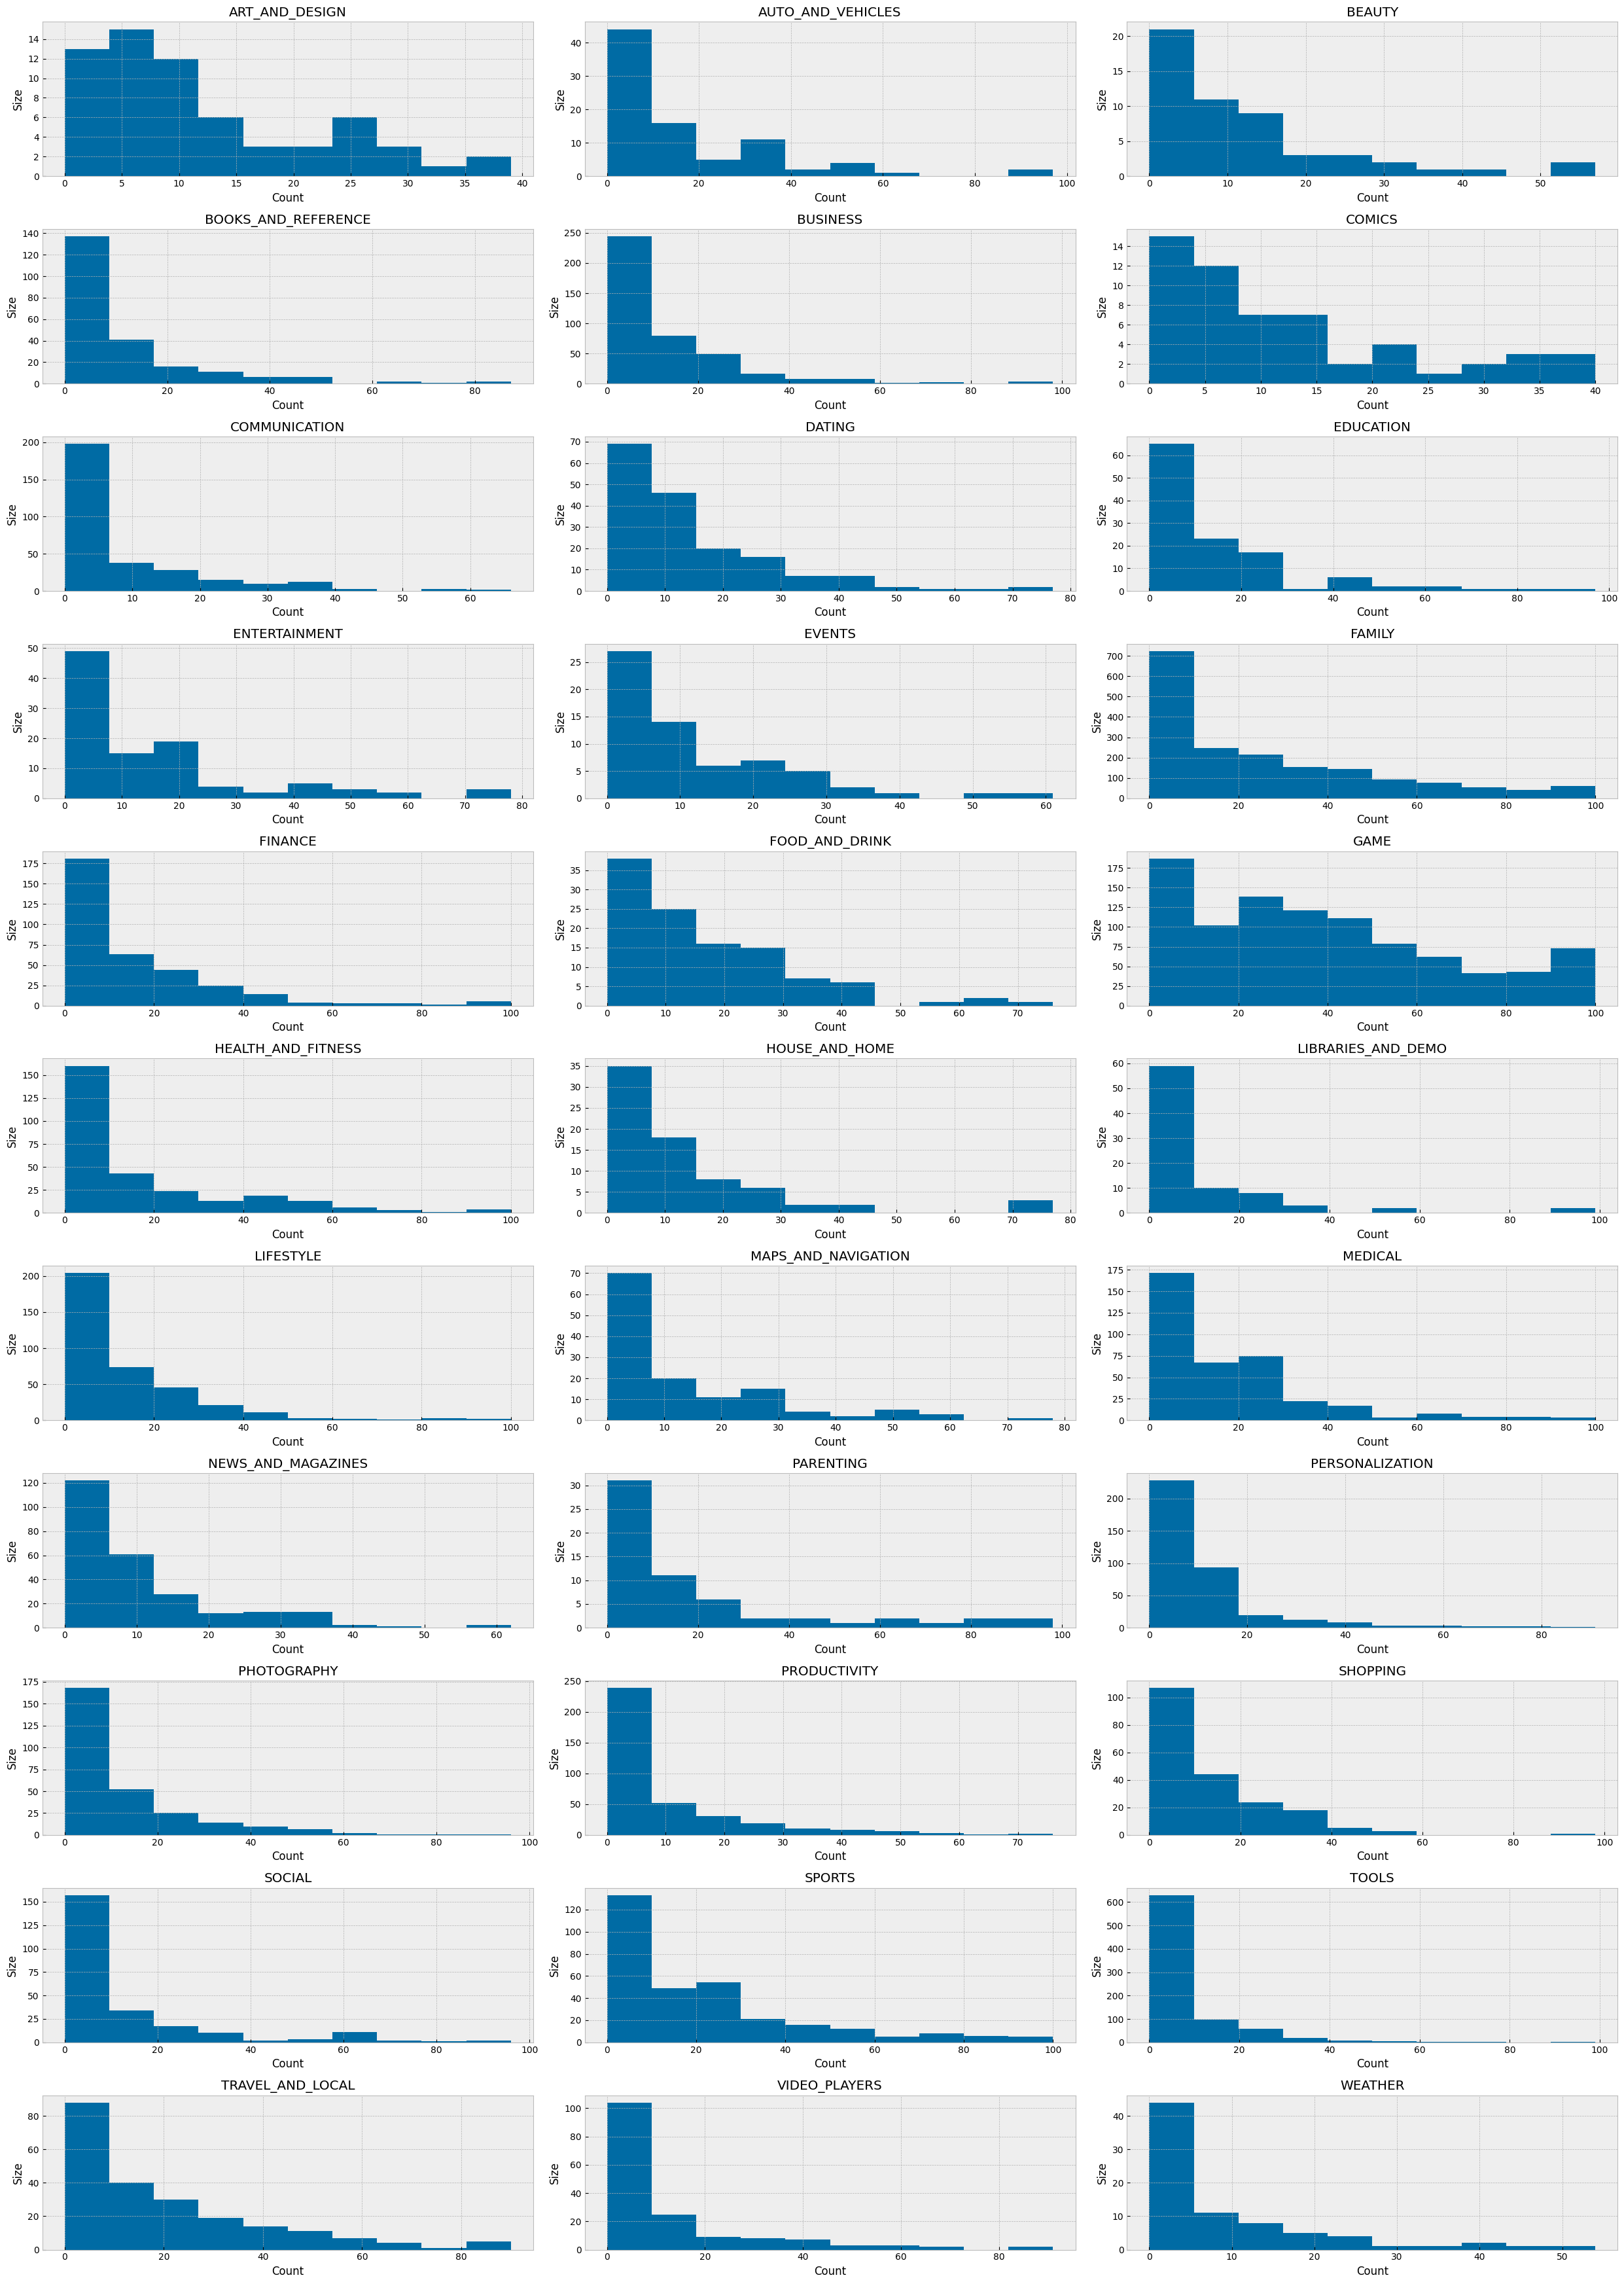

In [53]:
ncount=1
plt.figure(figsize=(25,35))
for x in np.unique(data_df.Category.values):
    plt.subplot(11,3,ncount)
    plt.hist(data_df[data_df.Category == x].Size.values)
    plt.title(x)
    plt.ticklabel_format(useOffset=False, style='sci')
    plt.xlabel("Count")
    plt.ylabel("Size")
    ncount = ncount + 1
plt.tight_layout()

The above graphical representation we can see that most of the apps are low to mid range in size as compared to games where apps are slightly higher in size.

Ques. 7 - Analyizing the numerical data columns and deriving corelation between them via heatmap ?

<ipython-input-55-e01feeb8662f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Heatmap for numerical columns')

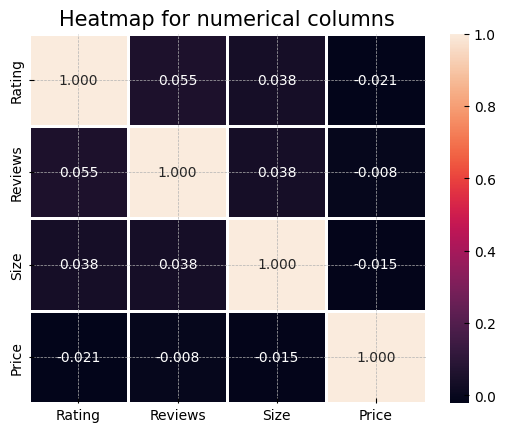

In [55]:
sns.heatmap(data_df.corr(), annot = True, linewidths=1.0, fmt=".3f")
plt.title("Heatmap for numerical columns", size=15)

The Above map on inspecting clearly shows the positive corelationship between reviews and install which is 0.625 i.e. as the the number of reviews increases, the number of installations also increase.

Similarly we can see corelations between other numeric columns too.

Ques. 8 - which is the most expensive app in the google play store ?

In [56]:
data_df[data_df['Price'] == data_df['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,Lifestyle,4.1 and up,"10,000"


In [69]:
max_price = data_df['Price'].max()
print(f"The most expensive price of the Application in google play store is  Rs {max_price}.")

The most expensive price of the Application in google play store is  Rs 400.0.


In [73]:
max_price_app = data_df[data_df['Price'] == max_price]
for app in max_price_app['App']:
    print(f"The app with the maximum price is: {app}")

The app with the maximum price is: I'm Rich - Trump Edition


Ques.9 - How many apps are there whose rating is 5 ?

In [74]:
data_df[data_df['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Ins
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,"1,000+",Free,0.00,Everyone,Comics,4.0.3 and up,"1,000"
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,"1,000+",Free,0.00,Mature 17+,Dating,4.0.3 and up,"1,000"
615,Awake Dating,DATING,5.0,2.0,70.0,100+,Free,0.00,Mature 17+,Dating,4.4 and up,100
633,Spine- The dating app,DATING,5.0,5.0,9.3,500+,Free,0.00,Teen,Dating,4.0.3 and up,500
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100+,Free,0.00,Mature 17+,Dating,4.0.3 and up,100
...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Mu.F.O.,GAME,5.0,2.0,16.0,1+,Paid,0.99,Everyone,Arcade,2.3 and up,1
10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16.0,100+,Free,0.00,Everyone,Arcade,4.1 and up,100
10742,GKPB FP Online Church,LIFESTYLE,5.0,32.0,7.9,"1,000+",Free,0.00,Everyone,Lifestyle,4.4 and up,"1,000"
10776,Monster Ride Pro,GAME,5.0,1.0,24.0,10+,Free,0.00,Everyone,Racing,2.3 and up,10


Ques. 11 - Relationship between 'Rating' & 'Reviews' ?

Apps having > 1 million reviews


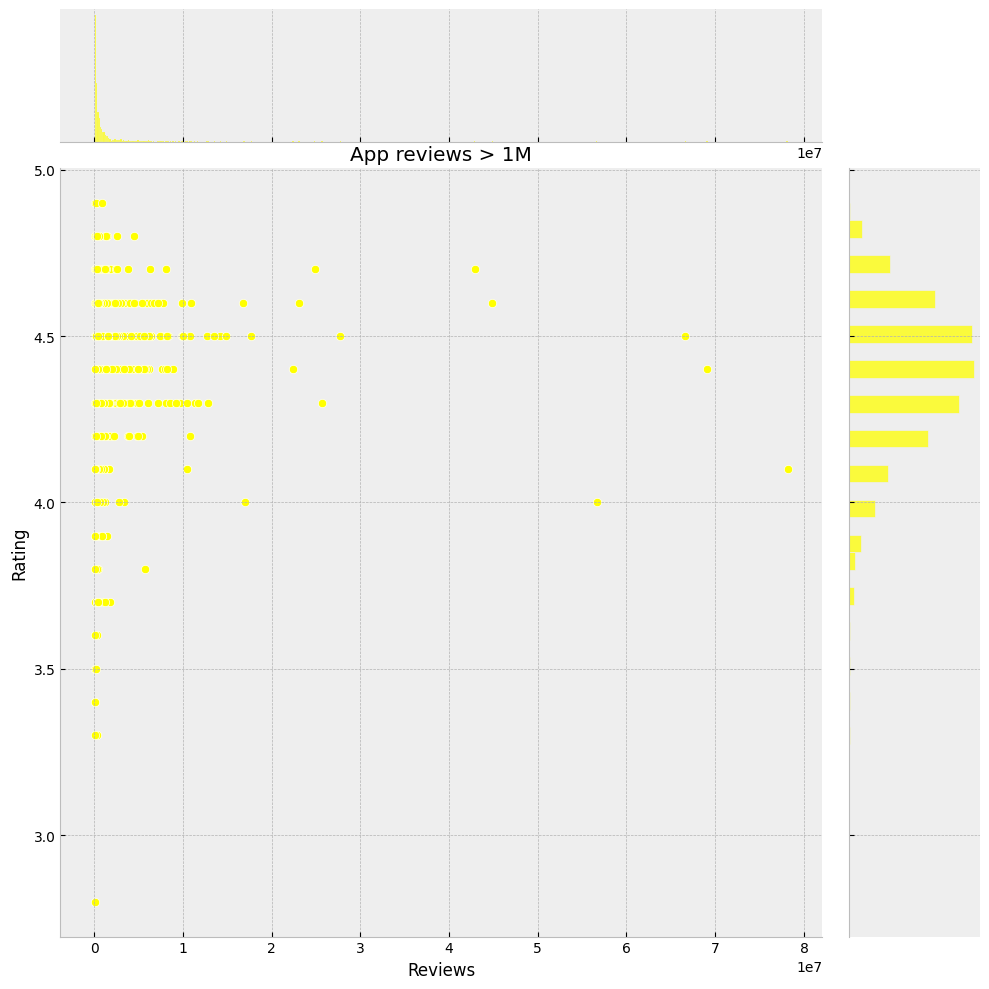

Apps having < 1 million reviews


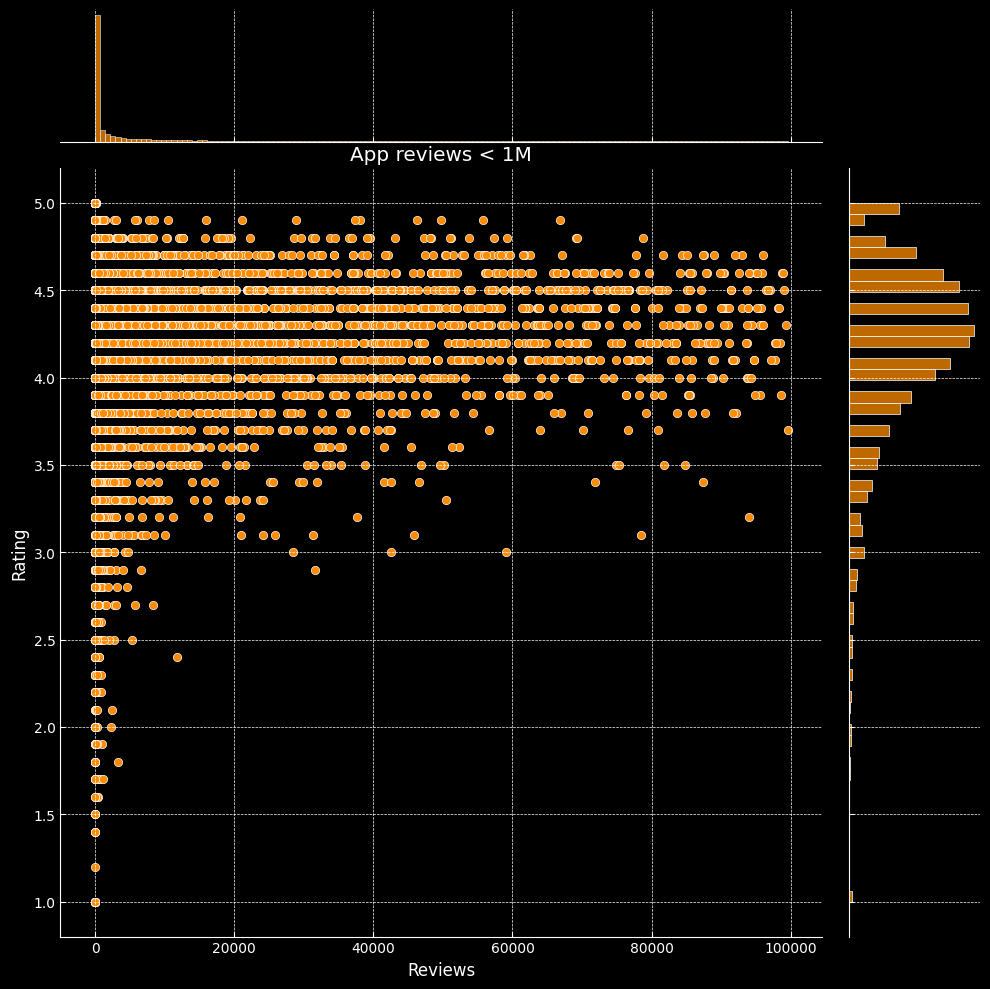

In [75]:
print('Apps having > 1 million reviews')
sns.jointplot(x='Reviews',y='Rating',data =data_df[data_df['Reviews'] > 100000],color='yellow', height=10)

plt.title('App reviews > 1M')
plt.style.use('dark_background')
plt.show()

print('Apps having < 1 million reviews')
sns.jointplot(x='Reviews',y='Rating',data =data_df[data_df['Reviews']<100000],color ='darkorange', height=10)

plt.title('App reviews < 1M')
plt.style.use('dark_background')
plt.show()